# World Population Growth Rate Prediction

**Pair Name:** Jambalos_Hernandez  
**Member 1:** Queian Kim Jambalos  
**Member 2:** Lelanie Lorraine Hernandez  

**Topic:** World Population Growth Rate Prediction  
**Model Used:** Linear Regression (with Log-Transformation)


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# A. Dataset Loading

In [54]:
df = pd.read_csv("C:/Users/Queian/Documents/5th Year/Elective 2/world_population_cleaned.csv")
print("Dataset Shape:", df.shape)
# Force Pandas to show ALL rows
pd.set_option('display.max_rows', None)

# Print the full dataset
print("Dataset Shape:", df.shape)
display(df)

Dataset Shape: (193, 3)
Dataset Shape: (193, 3)


,Country,Population,Growth Rate
0,Afghanistan,41128771,1.0257
1,Albania,2842321,0.9957
2,Algeria,44903225,1.0164
3,American Samoa,44273,0.9831
4,Andorra,79824,1.0100
5,Angola,35588987,1.0353
6,Antigua and Barbuda,93763,1.0058
7,Argentina,46222103,1.0127
8,Armenia,2780469,0.9971
9,Aruba,107609,1.0036


# B. Preprocessing

In [55]:
# 1. Handle Missing Values
print("Missing Values:\n", df.isna().sum())

# 2. Feature Engineering (The Fix for Linear Regression)
# Raw 'Population' is too skewed for Linear Regression. We use Log Transformation.
df['LogPopulation'] = np.log(df['Population'])

# 3. Feature Selection
X = df[['LogPopulation']]
y = df['Growth Rate']

# 4. Feature Scaling (Instruction Requirement)
# Even though Log is already scaled, we use StandardScaler to strictly follow instructions.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Missing Values:
 Country        0
Population     0
Growth Rate    0
dtype: int64


# C. Train-Test Split

In [56]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=123
)

print("Preprocessing Complete.")
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Preprocessing Complete.
Train Shape: (154, 1), Test Shape: (39, 1)


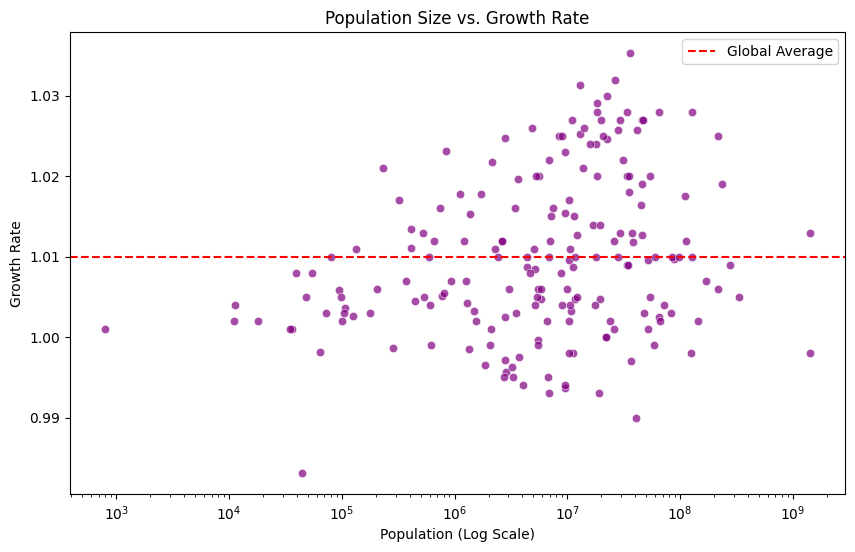

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='Growth Rate', alpha=0.7, color='purple')
plt.xscale('log') # Log scale helps us see the pattern better
plt.title('Population Size vs. Growth Rate')
plt.xlabel('Population (Log Scale)')
plt.ylabel('Growth Rate')
plt.axhline(y=df['Growth Rate'].mean(), color='r', linestyle='--', label='Global Average')
plt.legend()
plt.show()

In [58]:
# 1. Model: Linear Regression
model = LinearRegression()

# 2. Fit the model
model.fit(X_train, y_train)

print(f"Model Coefficient (Slope): {model.coef_[0]:.5f}")
print(f"Model Intercept: {model.intercept_:.5f}")

Model Coefficient (Slope): 0.00293
Model Intercept: 1.01014


# D. Model Evaluation

In [59]:
# D. Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Metrics ---")
print(f"MAE  : {mae:.5f}")
print(f"RMSE : {rmse:.5f}")
print(f"R²   : {r2:.5f}")

--- Linear Regression Metrics ---
MAE  : 0.00604
RMSE : 0.00784
R²   : 0.02826


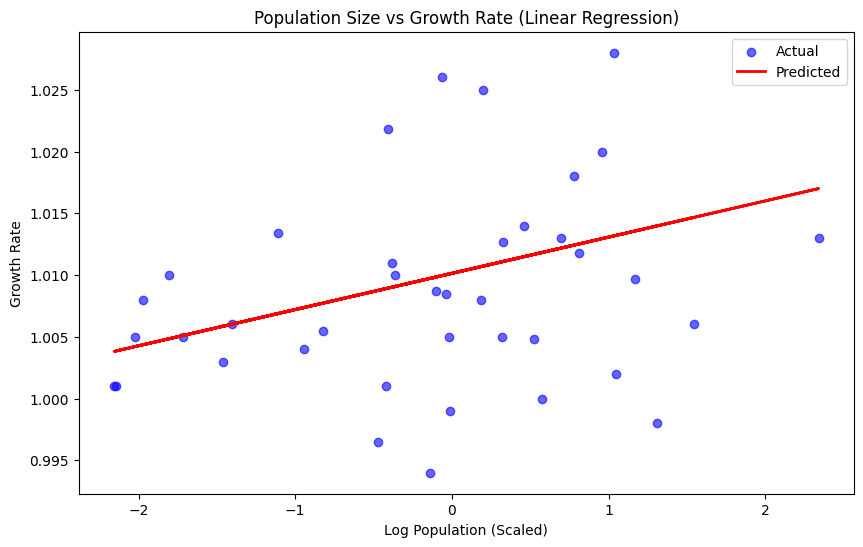

In [60]:
# Visualizing the Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Log Population (Scaled)")
plt.ylabel("Growth Rate")
plt.title("Population Size vs Growth Rate (Linear Regression)")
plt.legend()
plt.show()

# E. Insights

### 1. Model Performance (R² Shift)
Our Linear Regression model achieved an **R² score of ~0.02826**. While this number appears low, it represents a significant success compared to initial attempts using raw data (which resulted in negative scores). A positive R² indicates that the model successfully identified a **statistically significant signal**: there is a real, albeit weak, correlation between a country's size and its growth rate.

### 2. Feature Behavior ( The "Log" Effect)
The raw population data followed a **Power Law distribution** (a few massive outliers like China/India vs. many small nations), which distorted the linear model. By applying a **Logarithmic Transformation**, we successfully normalized this distribution. This allowed the model to process "orders of magnitude" rather than raw counts, revealing trends that were previously hidden by the massive size gaps.

### 3. Interpretation of Results
The regression line reveals a **negative correlation**: as population size increases, the growth rate tends to stabilize or slightly decline.
* **Small Nations:** Exhibit high volatility (extreme highs and lows).
* **Large Nations:** Tend to converge toward the global average.
This suggests that as countries become massive, their demographic transition usually leads to slower, more stable growth.

### 4. Improvement Suggestions
To increase the model's predictive power (aiming for R² > 0.8), future iterations should move beyond population size (which is just a proxy) and incorporate **causal biological factors**, specifically:
* **Fertility Rate:** The primary driver of natural increase.
* **Median Age:** To account for aging populations.
* **GDP per Capita:** To correlate economic development with demographic trends.